In [1]:
import sys
IN_COLAB = "google.colab" in sys.modules
!pip install --quiet scvi-tools[tutorials]==0.9.0

     |████████████████████████████████| 184kB 23.7MB/s 
     |████████████████████████████████| 829kB 41.8MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 122kB 50.5MB/s 
     |████████████████████████████████| 245kB 52.7MB/s 
     |████████████████████████████████| 634kB 55.9MB/s 
     |████████████████████████████████| 204kB 56.2MB/s 
     |████████████████████████████████| 2.4MB 50.8MB/s 
     |████████████████████████████████| 10.3MB 46.1MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 45.0MB/s 
     |████████████████████████████████| 8.7MB 28.9MB/s 
     |████████████████████████████████| 829kB 52.1MB/s 
     |████████████████████████████████| 276kB 57.4MB/s 
     |████████████████████████████████| 112kB 50.5MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 112kB 59.7MB/s 
     |████████████████████████████████| 1.3MB 48.0MB

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=10l6m2KKKioCZnQlRHomheappHh-jTFmx'
output = 'sce_follicular_annotated_final.h5ad'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=10l6m2KKKioCZnQlRHomheappHh-jTFmx
To: /content/sce_follicular_annotated_final.h5ad
83.0MB [00:01, 57.0MB/s]


'sce_follicular_annotated_final.h5ad'

In [3]:
url = 'https://drive.google.com/uc?id=1Pae7VEcoZbKRvtllGAEWG4SOLWSjjtCO'
output = 'sce_hgsc_annotated_final.h5ad'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Pae7VEcoZbKRvtllGAEWG4SOLWSjjtCO
To: /content/sce_hgsc_annotated_final.h5ad
110MB [00:01, 79.4MB/s] 


'sce_hgsc_annotated_final.h5ad'

In [4]:
url = 'https://drive.google.com/uc?id=1Mk5uPdnPC4IMRnuG5N4uFvypT8hPdJ74'
output = 'HGSC_celltype.csv'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1tJSOI9ve0i78WmszMLx2ul8F8tGycBTd'
output = 'FL_celltype.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Mk5uPdnPC4IMRnuG5N4uFvypT8hPdJ74
To: /content/HGSC_celltype.csv
100%|██████████| 1.16k/1.16k [00:00<00:00, 1.98MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tJSOI9ve0i78WmszMLx2ul8F8tGycBTd
To: /content/FL_celltype.csv
100%|██████████| 446/446 [00:00<00:00, 890kB/s]


'FL_celltype.csv'

In [5]:
import scvi
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

scvi.settings.seed = 0

In [6]:
sns.reset_orig()
sc.settings._vector_friendly = True
# p9.theme_set(p9.theme_classic)
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True
plt.rcParams["figure.figsize"] = (4, 4)

plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.titleweight"] = 500
plt.rcParams["axes.titlepad"] = 8.0
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = 500
plt.rcParams["axes.linewidth"] = 1.2
plt.rcParams["axes.labelpad"] = 6.0
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False


plt.rcParams["font.size"] = 11
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', "Computer Modern Sans Serif", "DejaVU Sans"]
plt.rcParams['font.weight'] = 500

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['xtick.minor.size'] = 1.375
plt.rcParams['xtick.major.size'] = 2.75
plt.rcParams['xtick.major.pad'] = 2
plt.rcParams['xtick.minor.pad'] = 2

plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['ytick.minor.size'] = 1.375
plt.rcParams['ytick.major.size'] = 2.75
plt.rcParams['ytick.major.pad'] = 2
plt.rcParams['ytick.minor.pad'] = 2

plt.rcParams["legend.fontsize"] = 12
plt.rcParams['legend.handlelength'] = 1.4
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 3
plt.rcParams['legend.frameon'] = False

plt.rcParams['lines.linewidth'] = 1.7

DPI = 300

## Folicular

In [7]:
adata = sc.read("sce_follicular_annotated_final.h5ad")
adata.var_names_make_unique()
adata.obs_names_make_unique()

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [8]:
marker_gene_mat = pd.read_csv('FL_celltype.csv', index_col=0)

In [9]:
marker_gene_mat.head()

,B cells,Cytotoxic T cells,CD4 T cells,Tfh,other
Gene,,,,,
CCL5,0,1,0,0,0
CD19,1,0,0,0,0
CD2,0,1,1,1,0
CD3D,0,1,1,1,0
CD3E,0,1,1,1,0


In [10]:
bdata = adata[:, marker_gene_mat.index].copy()

In [11]:
scvi.data.setup_anndata(bdata)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
WARNING  This dataset has some empty cells, this might fail inference.Data should be filtered
         with `scanpy.pp.filter_cells()`                                                     
INFO     Successfully registered anndata object containing 9156 cells, 24 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [12]:
from scvi.external import CellAssign
model = CellAssign(bdata, marker_gene_mat, "size_factor")
model.train()

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:38<00:00, 10.50it/s, loss=19.9, v_num=1]


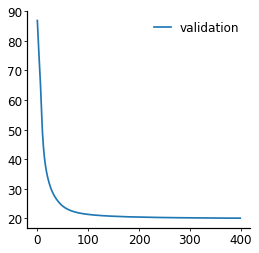

In [13]:
from matplotlib import pyplot as plt
plt.plot(model.history["elbo_validation"], label="validation")
plt.legend()

In [14]:
predictions = model.predict()

In [15]:
pred_vs_actual = pd.DataFrame(predictions.idxmax(axis=1).values,bdata.obs['celltype'].values).reset_index().rename(columns={"index":"prediction",0:"actual"})
pred_vs_actual.loc[pred_vs_actual['prediction'] != pred_vs_actual['actual']]

,prediction,actual
226,Tfh,CD4 T cells
247,Tfh,Cytotoxic T cells
267,Tfh,CD4 T cells
296,CD4 T cells,Tfh
301,Tfh,CD4 T cells
362,CD4 T cells,Cytotoxic T cells
462,CD4 T cells,Tfh
557,B cells,CD4 T cells
777,Tfh,CD4 T cells
960,Tfh,CD4 T cells


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


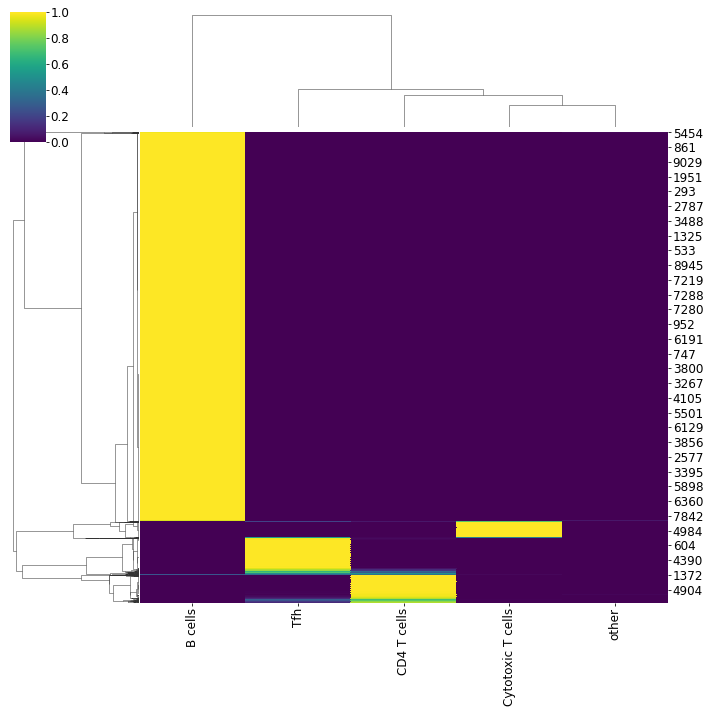

In [16]:
sns.clustermap(predictions, cmap="viridis")

In [17]:
bdata.obs["scvi-tools predictions"] = predictions.idxmax(axis=1).values

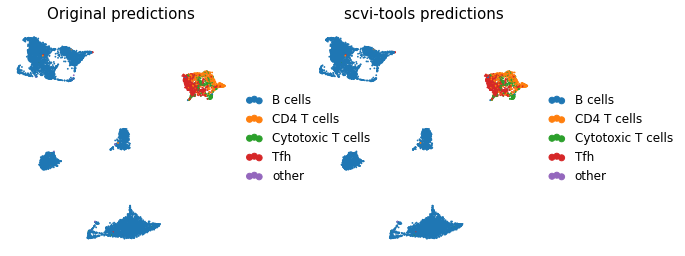

In [21]:
fig = sc.pl.umap(
    bdata,
    color=["celltype", "scvi-tools predictions"],
    title=["Original predictions", "scvi-tools predictions"],
    frameon=False,
    return_fig=True,
)
fig.savefig("cellassign_follicular.pdf", bbox_inches="tight", dpi=DPI)

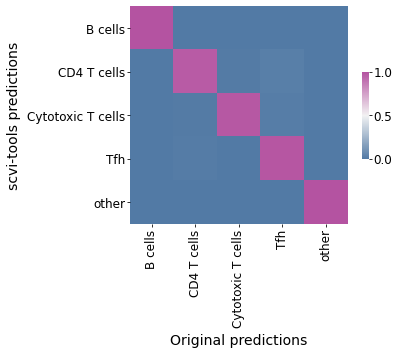

In [26]:
df = bdata.obs
confusion_matrix = pd.crosstab(
    df["scvi-tools predictions"],
    df["celltype"],
    rownames=["scvi-tools predictions"],
    colnames=["Original predictions"],
)
confusion_matrix /= confusion_matrix.sum(1).ravel().reshape(-1, 1)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    confusion_matrix,
    cmap=sns.diverging_palette(245, 320, s=60, as_cmap=True),
    ax=ax,
    square=True,
    cbar_kws=dict(shrink=0.4, aspect=12),
)
fig.savefig("cellassign_cm_follicular.pdf", dpi=DPI, bbox_inches="tight")

## HGSC

In [27]:
hgsc_adata = scvi.data.read_h5ad("sce_hgsc_annotated_final.h5ad")
hgsc_adata.var_names_make_unique()
hgsc_adata.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [28]:
marker_gene_mat_hgsc = pd.read_csv('HGSC_celltype.csv', index_col=0)

In [29]:
hgsc_bdata = hgsc_adata[:, marker_gene_mat_hgsc.index].copy()

In [30]:
scvi.data.setup_anndata(hgsc_bdata)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              
INFO     Successfully registered anndata object containing 4848 cells, 41 vars, 1 batches, 1 
         labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra  
         continuous covariates.                                                              
INFO     Please do not further modify adata until model is trained.                          


In [31]:
from scvi.external import CellAssign
model_hgsc = CellAssign(hgsc_bdata, marker_gene_mat_hgsc, "size_factor")
model_hgsc.train()

GPU available: True, used: True
TPU available: None, using: 0 TPU cores


Epoch 400/400: 100%|██████████| 400/400 [00:31<00:00, 12.74it/s, loss=40.9, v_num=1]


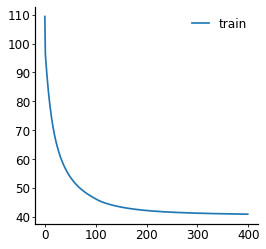

In [32]:
from matplotlib import pyplot as plt
plt.plot(model_hgsc.history["elbo_train"], label="train")
plt.legend()

In [33]:
predictions_hgsc = model_hgsc.predict()

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


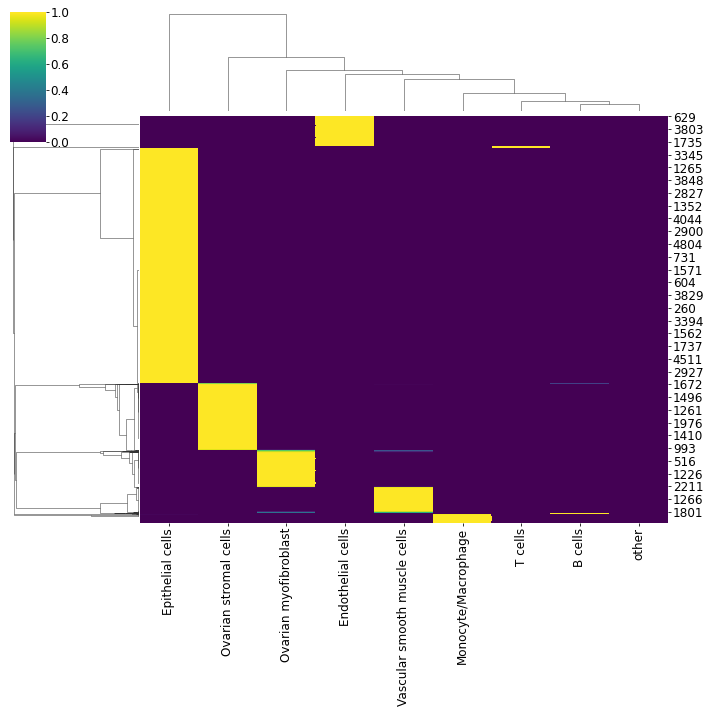

In [34]:
sns.clustermap(predictions_hgsc, cmap="viridis")

In [35]:
hgsc_bdata.obs["scvi-tools predictions"] = predictions_hgsc.idxmax(axis=1).values

... storing 'scvi-tools predictions' as categorical


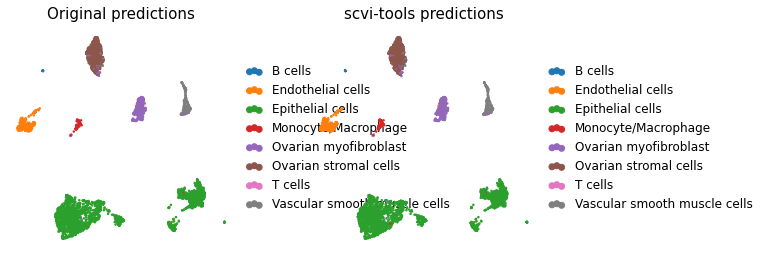

In [36]:
fig = sc.pl.umap(
    hgsc_bdata,
    color=["celltype", "scvi-tools predictions"],
    title=["Original predictions", "scvi-tools predictions"],
    frameon=False,
    return_fig=True,
)
fig.savefig("cellassign_hgsc.pdf", bbox_inches="tight", dpi=DPI)

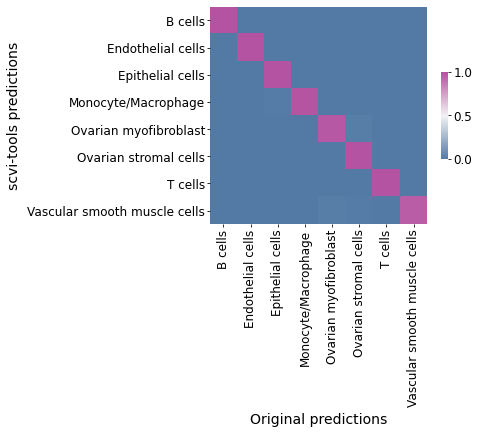

In [37]:
df = hgsc_bdata.obs
confusion_matrix = pd.crosstab(
    df["scvi-tools predictions"],
    df["celltype"],
    rownames=["scvi-tools predictions"],
    colnames=["Original predictions"],
)
confusion_matrix /= confusion_matrix.sum(1).ravel().reshape(-1, 1)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    confusion_matrix,
    cmap=sns.diverging_palette(245, 320, s=60, as_cmap=True),
    ax=ax,
    square=True,
    cbar_kws=dict(shrink=0.4, aspect=12),
)
fig.savefig("cellassign_cm_hgsc.pdf", dpi=DPI, bbox_inches="tight")